https://www.kaggle.com/startupsci/titanic-data-science-solutions

## Table of Content

1. Hypothesis Generation

2. Data Exploration (EDA)

3. Data Cleaning & Feature Engineering

4. Model Building.

### Hypothesis Generation

1. Women (Sex=female) were more likely to have survived.

2. Children were more likely to have survived.

3. The upper-class passengers (Pclass=1) were more likely to have survived.

4. Old aged people are also given preference.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train_original=pd.read_csv('train.csv')
test_original=pd.read_csv('test.csv')

In [3]:
train=train_original.copy()
test=test_original.copy()

In [4]:
train.shape,test.shape

((891, 12), (418, 11))

In [5]:
train['source']='train'
test['source']='test'

In [6]:
data=pd.concat([train,test],ignore_index=True)

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


### Data Exploration (EDA)

In this part we will explore the data further to check for outliers, Univariate Analysis, Bivariate Aanalysis

#### Univariate Aanalysis.

In [8]:
data['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

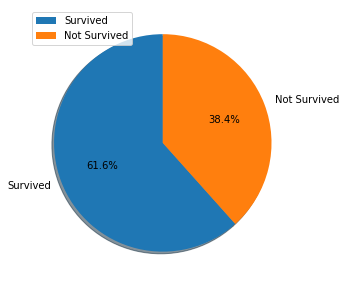

In [10]:
plt.figure(figsize=(5,5))
plt.pie(data['Survived'].value_counts(),labels=['Survived','Not Survived'],autopct='%1.1f%%',shadow=True, startangle=90)

plt.legend()

plt.savefig('univariate.png')
plt.show()

We can see that 61.6% of the passengers survived.

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


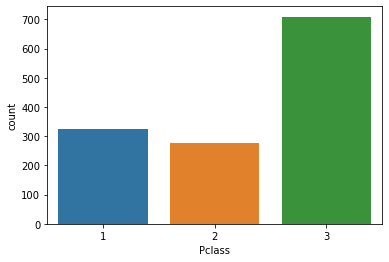

In [11]:
sns.countplot(data['Pclass'])
plt.savefig('univariate_1.png')

I think most of the passengers preferr class=3 

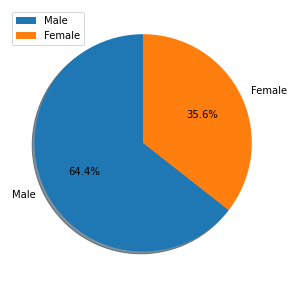

In [482]:
plt.figure(figsize=(5,5))
plt.pie(data['Sex'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%',shadow=True, startangle=90)

plt.legend()
plt.show()

Passengers are mostly males.

In [483]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

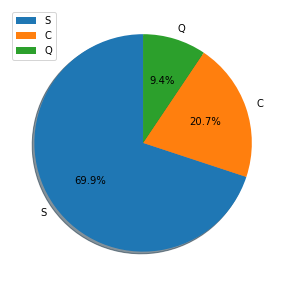

In [484]:
plt.figure(figsize=(5,5))
plt.pie(data['Embarked'].value_counts(),labels=['S','C','Q'],autopct='%1.1f%%',shadow=True, startangle=90)

plt.legend()
plt.show()

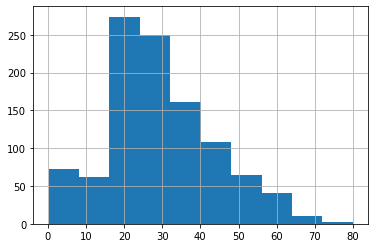

In [485]:
data['Age'].hist()

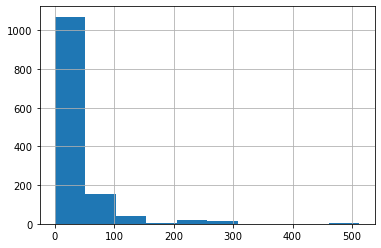

In [486]:
data['Fare'].hist()

#### Bivariate Anaysis

In this part we will analize the data with 2 variables one mainly being the Target Variable.

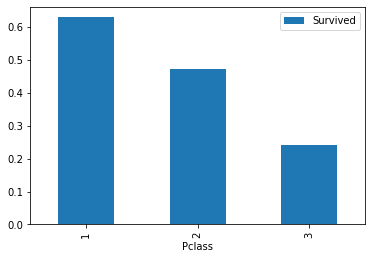

In [12]:
# data.groupby('Pclass')['Survived'].count().to_frame()

data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()
plt.savefig('bivariate.png')

We can see that Pclass=1 has the higher chance for survival

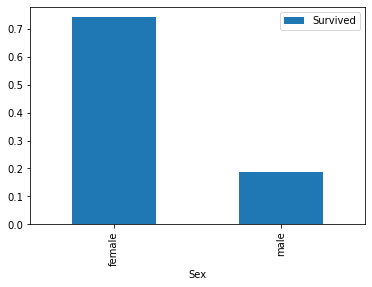

In [488]:
data[['Sex','Survived']].groupby('Sex').mean().plot.bar()

Females has a higher chance for survival

In [489]:
data.groupby(['Pclass','Sex'])['Survived'].mean().to_frame().sort_values(by='Survived',ascending=False)

,,Survived
Pclass,Sex,
1,female,0.968085
2,female,0.921053
3,female,0.500000
1,male,0.368852
2,male,0.157407
3,male,0.135447


C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


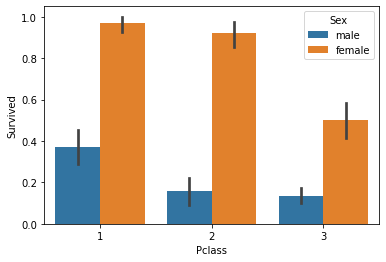

In [13]:
sns.barplot(data['Pclass'],data['Survived'],hue=data['Sex'])
plt.savefig('bivariate_1.png')

- We can see that Females belonging to Pclass=1 have the highest chance of survival.

- Whereas malesof Pclass=3 have the lowest.

- In general the Females are Given preference over Males.

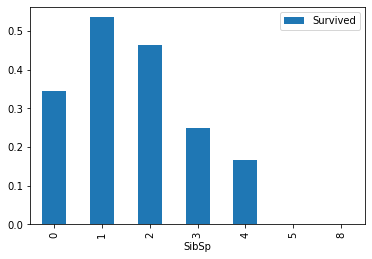

In [491]:
data[['SibSp','Survived']].groupby('SibSp').mean().plot.bar()

It shows the passengers with either Sibling or Spouce have higher chance .

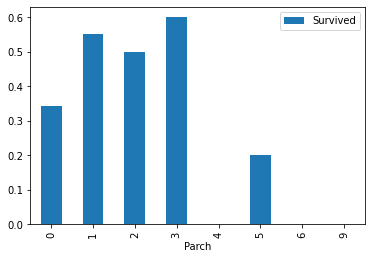

In [492]:
data[['Parch','Survived']].groupby('Parch').mean().plot.bar()

It shows the passengers with either Parents or Children have higher chance .

C:\Users\Dishaa\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Dishaa\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


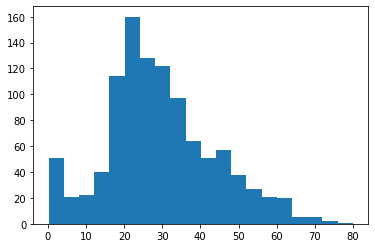

In [493]:
plt.hist(data['Age'],bins=20)
plt.show()

In [494]:
data.groupby(['Embarked','Sex'])['Survived'].mean().to_frame()

Survived
Embarked Sex             
C        female  0.876712
         male    0.305263
Q        female  0.750000
         male    0.073171
S        female  0.689655
         male    0.174603

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


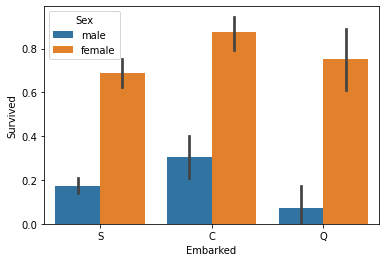

In [495]:
sns.barplot(data['Embarked'],data['Survived'],hue=data['Sex'])

- We can see that passengers from 'C' have higher Survival rate and those who are Female.

- We can see that passengers from 'Q' have lowest Survival rate and those who are Male.

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


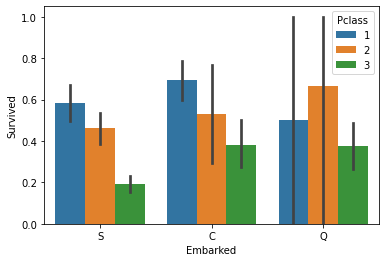

In [14]:
sns.barplot(data['Embarked'],data['Survived'],hue=data['Pclass'])
plt.savefig('bivariate_2.png')

- Pclass=1 passengers embarked from 'C' have the highest Survival rate.

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


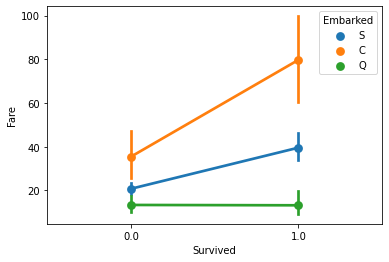

In [15]:
sns.pointplot('Survived','Fare',hue='Embarked',data=data)
plt.savefig('bivariate_3.png')

- We can see that 'C' has the Highest Fare as compared to others.

- Highest Survival rate are for those Passengers which have Embarked from 'C' with the Pclass=1 because of high Fare price.

### Data Cleaning & Feature Engineering

Now let us try to extract the information from the Name column.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  source       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [17]:
data['Title']=data['Name'].str.extract('(\w+)\.' ,expand=False)

In [18]:
data[['Title','Survived']].groupby('Title').mean()

,Survived
Title,
Capt,0.000000
Col,0.500000
Countess,1.000000
Don,0.000000
Dona,NaN
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000


In [19]:
data['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Mlle          2
Major         2
Dona          1
Lady          1
Mme           1
Countess      1
Don           1
Sir           1
Capt          1
Jonkheer      1
Name: Title, dtype: int64

We can see that there are many titles with spelling mistakes and those which are rarely present.

In [20]:
data['Title']=data['Title'].replace(['Rev','Dr','Col','Major','Countess','Jonkheer',\
                                    'Don','Dona','Lady','Capt','Sir'],'Rare')

data['Title']=data['Title'].replace('Ms','Miss')
data['Title']=data['Title'].replace('Mlle','Miss')
data['Title']=data['Title'].replace('Mme','Mrs')

In [21]:
data[['Title','Survived']].groupby('Title').mean().sort_values(by='Survived',ascending=False)

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Rare,0.347826
Mr,0.156673


C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


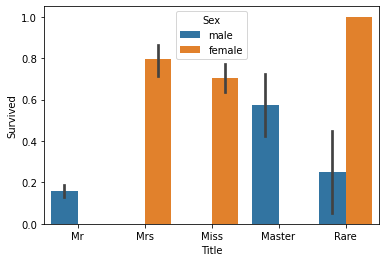

In [22]:
sns.barplot(data['Title'],data['Survived'],hue=data['Sex'])
plt.savefig('feature_engineering.png')

We can see that Mostly Mrs and Miss which are Females have the highest Survival rate.

and case of rare category also the Females have the highest chance of survival.

###### Now we can do Encoding on the Title column. 

In [23]:
title_mapping={'Mr':1,'Mrs':2,'Miss':3,'Master':4,'Rare':5}

data['Title']=data['Title'].map(title_mapping)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  source       1309 non-null   object 
 13  Title        1309 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 143.3+ KB


###### Now we will perform the Encoding on the Sex column

In [25]:
Sex_mapping={'male':0,'female':1}

data['Sex']=data['Sex'].map(Sex_mapping)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  source       1309 non-null   object 
 13  Title        1309 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 143.3+ KB


##### Now we will fill the Missing values in the Age column and the form bins.

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


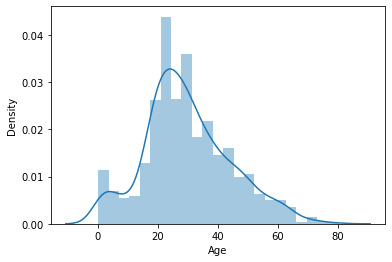

In [27]:
sns.distplot(data['Age'])

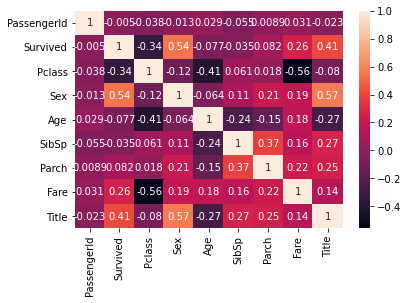

In [28]:
sns.heatmap(data.corr(),annot=True)

In [29]:
Age_mean=data.groupby(['Pclass','Sex'])['Age'].median()
Age_mean

Pclass  Sex
1       0      42.0
        1      36.0
2       0      29.5
        1      28.0
3       0      25.0
        1      22.0
Name: Age, dtype: float64

In [30]:
def impute_age(columns):
    age=columns[0]
    pclass=columns[1]
    sex=columns[2]
    if pd.isnull(age):
        if pclass==1 and sex==0:
            return Age_mean[1][0]
        elif pclass==1 and sex==1:
            return Age_mean[1][1]
        
        if pclass==2 and sex==0:
            return Age_mean[2][0]
        elif pclass==2 and sex==1:
            return Age_mean[2][1]
        
        if pclass==3 and sex==0:
            return Age_mean[3][0]
        elif pclass==3 and sex==1:
            return Age_mean[3][1]
    else:
        return age

In [31]:
data['Age']=data[['Age','Pclass','Sex']].apply(impute_age,axis=1)

In [32]:
data['Age']=data['Age'].astype(int)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   int32  
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  source       1309 non-null   object 
 13  Title        1309 non-null   int64  
dtypes: float64(2), int32(1), int64(6), object(5)
memory usage: 138.2+ KB


In [34]:
data['Age_bin']=pd.cut(data['Age'],5)

In [35]:
data[['Age_bin','Survived']].groupby('Age_bin').mean()

,Survived
Age_bin,
"(-0.08, 16.0]",0.550000
"(16.0, 32.0]",0.337374
"(32.0, 48.0]",0.412037
"(48.0, 64.0]",0.434783
"(64.0, 80.0]",0.090909


C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


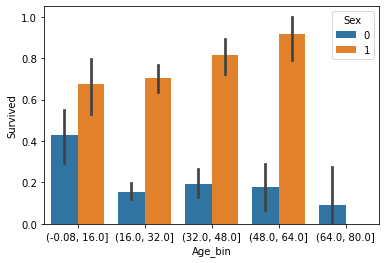

In [36]:
sns.barplot(data['Age_bin'],data['Survived'],hue=data['Sex'])
plt.savefig('feature_engineering_1.png')

Again one of our hypothesis is true as we can see that Children (0-16) and mainly Females are given more prefrence.

##### Now we will convert the Age_bin feature to ordinal one.

In [37]:
data.loc[data['Age']<=16,'Age']=0
data.loc[(data['Age']>16) & (data['Age']<=32),'Age']=1
data.loc[(data['Age']>32) & (data['Age']<=48),'Age']=2
data.loc[(data['Age']>48) & (data['Age']<=64),'Age']=3
data.loc[(data['Age']>64) & (data['Age']<=80),'Age']=4

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   int64   
 5   Age          1309 non-null   int32   
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   object  
 12  source       1309 non-null   object  
 13  Title        1309 non-null   int64   
 14  Age_bin      1309 non-null   category
dtypes: category(1), float64(2), int32(1), int64(6), object(5)
memory usage: 139.7+ KB


##### Creating a new Feature Family .

In [39]:
data['Family_size']=data['SibSp']+data['Parch']

In [40]:
data[['Family_size','Survived']].groupby('Family_size').mean()

,Survived
Family_size,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [41]:
data['IsAlone']=np.where(data['Family_size']==1,0,1)

In [42]:
data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.552795
1,1,0.346575


In [43]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
source            0
Title             0
Age_bin           0
Family_size       0
IsAlone           0
dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   int64   
 5   Age          1309 non-null   int32   
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   object  
 12  source       1309 non-null   object  
 13  Title        1309 non-null   int64   
 14  Age_bin      1309 non-null   category
 15  Family_size  1309 non-null   int64   
 16  IsAlone      1309 non-null   int32   
dtypes: category(1), float64(2), int32(2), int64(7), object(5)
memory usage:

##### We will now fill the NaN values in Embarked column.

In [45]:
data.Embarked.dropna().mode()[0]

'S'

In [46]:
data['Embarked']=data['Embarked'].fillna(data.Embarked.dropna().mode()[0])

In [47]:
data.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

#### Encoding the Embarked column

In [48]:
Embarked_mapping={'S': 0, 'C': 1, 'Q': 2}

data['Embarked']=data['Embarked'].map(Embarked_mapping)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   int64   
 5   Age          1309 non-null   int32   
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1309 non-null   int64   
 12  source       1309 non-null   object  
 13  Title        1309 non-null   int64   
 14  Age_bin      1309 non-null   category
 15  Family_size  1309 non-null   int64   
 16  IsAlone      1309 non-null   int32   
dtypes: category(1), float64(2), int32(2), int64(8), object(4)
memory usage:

##### Fill the missing value in the Fare column. We will proceed with the Fare column in the similar way as we did for the Age column.

In [50]:
data['Fare'].median()

14.4542

In [51]:
data['Fare']=data['Fare'].fillna(data['Fare'].dropna().median())

In [52]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
source            0
Title             0
Age_bin           0
Family_size       0
IsAlone           0
dtype: int64

In [53]:
data['Fare_bin']=pd.qcut(data['Fare'],4)

In [54]:
data[['Fare_bin','Survived']].groupby('Fare_bin').mean()

,Survived
Fare_bin,
"(-0.001, 7.896]",0.197309
"(7.896, 14.454]",0.303571
"(14.454, 31.275]",0.441048
"(31.275, 512.329]",0.600000


In [55]:
data.loc[data['Fare']<=13.0,'Fare']=0
data.loc[(data['Fare']>13.0) & (data['Fare']<=26.0),'Fare']=1
data.loc[(data['Fare']>26.0) & (data['Fare']<=39.0),'Fare']=2
data.loc[(data['Fare']>39.0) & (data['Fare']<=52.0),'Fare']=3
data.loc[(data['Fare']>52.0) & (data['Fare']<=65.0),'Fare']=4

In [56]:
data['Fare'] = data['Fare'].astype(int)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   int64   
 5   Age          1309 non-null   int32   
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1309 non-null   int32   
 10  Cabin        295 non-null    object  
 11  Embarked     1309 non-null   int64   
 12  source       1309 non-null   object  
 13  Title        1309 non-null   int64   
 14  Age_bin      1309 non-null   category
 15  Family_size  1309 non-null   int64   
 16  IsAlone      1309 non-null   int32   
 17  Fare_bin     1309 non-null   category
dtypes: category(2), float64(1), 

In [58]:
data[['Fare','Survived']].groupby('Fare').mean()

,Survived
Fare,
0,0.247664
1,0.422619
2,0.454545
3,0.305556
4,0.757576
66,0.500000
69,0.222222
71,0.666667
73,0.000000


#### Removing the Unecessary features.

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   int64   
 5   Age          1309 non-null   int32   
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1309 non-null   int32   
 10  Cabin        295 non-null    object  
 11  Embarked     1309 non-null   int64   
 12  source       1309 non-null   object  
 13  Title        1309 non-null   int64   
 14  Age_bin      1309 non-null   category
 15  Family_size  1309 non-null   int64   
 16  IsAlone      1309 non-null   int32   
 17  Fare_bin     1309 non-null   category
dtypes: category(2), float64(1), 

In [60]:
data=data.drop(['Name','SibSp','Parch','Ticket','Cabin','Age_bin','Family_size','Fare_bin'],axis=1)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1309 non-null   int32  
 5   Fare         1309 non-null   int32  
 6   Embarked     1309 non-null   int64  
 7   source       1309 non-null   object 
 8   Title        1309 non-null   int64  
 9   IsAlone      1309 non-null   int32  
dtypes: float64(1), int32(3), int64(5), object(1)
memory usage: 87.1+ KB


In [62]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,source,Title,IsAlone
0,1,0.0,3,0,1,0,0,train,1,0
1,2,1.0,1,1,2,71,1,train,2,0
2,3,1.0,3,1,1,0,0,train,3,1
3,4,1.0,1,1,2,4,0,train,2,0
4,5,0.0,3,0,2,0,0,train,1,1


In [63]:
data = pd.get_dummies(data, columns=['Pclass','Age','Fare','Embarked',
                              'Title'])

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 64 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Sex          1309 non-null   int64  
 3   source       1309 non-null   object 
 4   IsAlone      1309 non-null   int32  
 5   Pclass_1     1309 non-null   uint8  
 6   Pclass_2     1309 non-null   uint8  
 7   Pclass_3     1309 non-null   uint8  
 8   Age_0        1309 non-null   uint8  
 9   Age_1        1309 non-null   uint8  
 10  Age_2        1309 non-null   uint8  
 11  Age_3        1309 non-null   uint8  
 12  Age_4        1309 non-null   uint8  
 13  Fare_0       1309 non-null   uint8  
 14  Fare_1       1309 non-null   uint8  
 15  Fare_2       1309 non-null   uint8  
 16  Fare_3       1309 non-null   uint8  
 17  Fare_4       1309 non-null   uint8  
 18  Fare_66      1309 non-null   uint8  
 19  Fare_6

In [65]:
data.head()

,PassengerId,Survived,Sex,source,IsAlone,Pclass_1,Pclass_2,Pclass_3,Age_0,Age_1,...,Fare_263,Fare_512,Embarked_0,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4,Title_5
0,1,0.0,0,train,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0
1,2,1.0,1,train,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,3,1.0,1,train,1,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
3,4,1.0,1,train,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,0.0,0,train,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


#### Converting the data back to train & test

In [66]:
train=data.loc[data['source']=='train']
test=data.loc[data['source']=='test']

In [67]:
train.shape,test.shape

((891, 64), (418, 64))

In [68]:
train=train.drop('PassengerId',axis=1)

In [69]:
train['Survived']=train['Survived'].astype(int)

In [70]:
test.head()

,PassengerId,Survived,Sex,source,IsAlone,Pclass_1,Pclass_2,Pclass_3,Age_0,Age_1,...,Fare_263,Fare_512,Embarked_0,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4,Title_5
891,892,NaN,0,test,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
892,893,NaN,1,test,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
893,894,NaN,0,test,1,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
894,895,NaN,0,test,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0
895,896,NaN,1,test,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0


In [71]:
train.shape,test.shape

((891, 63), (418, 64))

In [72]:
test=test.drop(['source'],axis=1)
train=train.drop(['source'],axis=1)

In [73]:
test=test.drop('Survived',axis=1)

In [74]:
train.shape,test.shape

((891, 62), (418, 62))

In [75]:
test.head()

,PassengerId,Sex,IsAlone,Pclass_1,Pclass_2,Pclass_3,Age_0,Age_1,Age_2,Age_3,...,Fare_263,Fare_512,Embarked_0,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4,Title_5
891,892,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
892,893,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
893,894,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
894,895,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
895,896,1,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [76]:
X=train.drop(['Survived'],axis=1)
y=train['Survived']

In [77]:
X.head()

,Sex,IsAlone,Pclass_1,Pclass_2,Pclass_3,Age_0,Age_1,Age_2,Age_3,Age_4,...,Fare_263,Fare_512,Embarked_0,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4,Title_5
0,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,1,1,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [78]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int32

### Model Building

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [80]:
X_train=train
y_train=train['Survived']
X_test=test.drop('PassengerId',axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 62), (891,), (418, 61))

In [83]:
X_train.shape, y_train.shape, X_test.shape

((891, 62), (891,), (418, 61))

In [84]:
target='Survived'
Idcols=['PassengerId']
prediction_columns=[i for i in train.columns if i not in [target]+Idcols]


In [85]:
def model_fit(model,train,test,cols_needed,target,Idcol,filename):
    
    model.fit(train[cols_needed],train[target])
    
#     train_prediction=model.predict(train[cols_needed])
    
    cv_score=cross_val_score(model,train[cols_needed],train[target],cv=5,scoring='accuracy')
    
    print('CV_mean is : {}'.format(np.round(np.mean(cv_score),0)))
    print('CV_std is : {}'.format(np.round(np.std(cv_score),0)))
    
    test_prediction=model.predict(test[cols_needed])
    
    print('Model Accuracy is :',(np.round(model.score(train[cols_needed],train[target]),2))*100) 
    
    print(len(test_prediction))
    return test_prediction
    ## Adding the test predictions to the submission file
    submission=pd.DataFrame({x:test[x] for x in Idcol})
    submission[target]= test_prediction
    
    submission.to_csv(filename, index=False)
    
#     print(test_prediction) 

##### Logistic Regression

In [86]:
lr=LogisticRegression(solver='newton-cg',C=10.0)

# lr.fit(X_train,y_train)

print(model_fit(lr,train,test,prediction_columns,target,Idcols,'Logistic_Regression.csv'))

CV_mean is : 1.0
CV_std is : 0.0
Model Accuracy is : 84.0
418
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


###### Linear SVC

In [88]:
linear_svc=LinearSVC(C=1.0,random_state=5)

# linear_svc.fit(X_train,y_train)
print(model_fit(linear_svc,train,test,prediction_columns,target,Idcols,'Linear_SVC.csv'))

CV_mean is : 1.0
CV_std is : 0.0
Model Accuracy is : 83.0
418
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


##### KNN

In [89]:
knn=KNeighborsClassifier(n_neighbors=5)

# knn.fit(X_train,y_train)
print(model_fit(knn,train,test,prediction_columns,target,Idcols,'KNN.csv'))

CV_mean is : 1.0
CV_std is : 0.0
Model Accuracy is : 85.0
418
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1]


##### DecisionTreeClassifier

In [90]:
d_tree=DecisionTreeClassifier(random_state=5)

print(model_fit(d_tree,train,test,prediction_columns,target,Idcols,'Decision Tree.csv'))

CV_mean is : 1.0
CV_std is : 0.0
Model Accuracy is : 88.0
418
[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1]


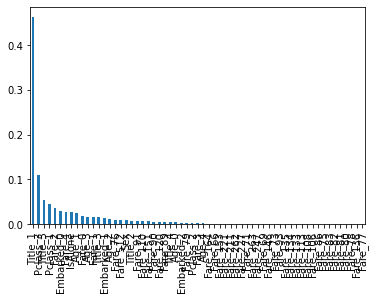

In [91]:
coef=pd.Series(d_tree.feature_importances_,prediction_columns).sort_values(ascending=False)
coef.plot(kind='bar', label='Feature Importance ')

plt.savefig('d_tree_feature_impotance.png')
plt.show()


In [92]:
cols=['Title_1','Pclass_3','Title_5','Fare_2','Pclass_1','IsAlone','Embarked_0','Age_2','Fare_3','Age_3','Title_2']

d_tree=DecisionTreeClassifier(random_state=5)

print(model_fit(d_tree,train,test,prediction_columns,target,Idcols,'Decision Tree.csv'))

CV_mean is : 1.0
CV_std is : 0.0
Model Accuracy is : 88.0
418
[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1]


##### RandomForestClassifier

In [93]:
r_tree=RandomForestClassifier(n_estimators=100)
print(model_fit(r_tree,train,test,prediction_columns,target,Idcols,'RandomForest.csv'))

CV_mean is : 1.0
CV_std is : 0.0
Model Accuracy is : 88.0
418
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1]


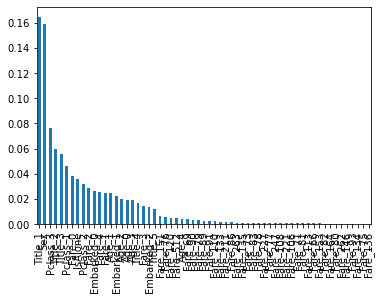

In [94]:
coef=pd.Series(r_tree.feature_importances_,prediction_columns).sort_values(ascending=False)
coef.plot(kind='bar', label='Feature Importance ')

plt.savefig('r_tree_feature_imporatnce.png')
plt.show()


In [95]:
cols=['Title_1','Sex','Pclass_3','Title_3','Title_2','Age_1','Title_4','Age_2','Pclass_2','Fare_0','Fare_1','Fare_2','Embarked_1']

r_tree=RandomForestClassifier()

print(model_fit(r_tree,train,test,prediction_columns,target,Idcols,'RandomForest.csv'))

CV_mean is : 1.0
CV_std is : 0.0
Model Accuracy is : 88.0
418
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 1 0 1 0 0 1]


### Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35]}

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(train[prediction_columns],train[target])

# random_tree=RandomForestClassifier()

# grid = GridSearchCV(estimator = random_tree, param_grid = parameters, cv = 5)

# grid.fit(train[prediction_columns],train[target])

In [ ]:
clf.best_params_

In [ ]:

r_tree=RandomForestClassifier(criterion='entropy',n_estimators=100,min_samples_leaf=1,min_samples_split=12)

print(model_fit(r_tree,train,test,prediction_columns,target,Idcols,'RandomForest_After_Hyper.csv'))